## Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline 
# the plot will show immediately below the code cell in the notebook.

## Load the data file 

In [2]:
telco_base_data = pd.read_csv('Dataset.csv')

## Initial Data Exploration of Telco Dataset

In [3]:
# Display the first 5 rows of the dataset
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the number of rows and columns in the dataset
telco_base_data.shape

(7043, 21)

In [5]:
# Display the column names in the dataset
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
# Show the data types of each column
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Generate summary statistics for numerical columns
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


| 🔢 **Feature**      | 📈 **Statistic**            | 🧠 **Insight**                                                                |
| ------------------- | --------------------------- | ----------------------------------------------------------------------------- |
| **SeniorCitizen**   | Mean = 0.162 (≈16%)         | Only 16% of customers are senior citizens. Majority are non-seniors.          |
|                     | 25%, 50%, 75% Quantiles = 0 | Confirms that most customers are not senior citizens.                         |
| **Tenure (months)** | Mean = 32.37                | Average customer stays for about 2.7 years.                                   |
|                     | Min = 0                     | Some customers are brand new (just joined).                                   |
|                     | 25% = 9, 50% = 29, 75% = 55 | 50% of customers have tenure below 29 months; top 25% have long tenure (>55). |
| **MonthlyCharges**  | Mean = ₹64.76               | Average customer pays about ₹65 per month.                                    |
|                     | Range = ₹18.25 to ₹118.75   | Wide price variation suggests multiple plans or add-ons.                      |
|                     | 25% = ₹35.50, 75% = ₹89.85  | 50% pay between ₹35 and ₹90 — split between basic and premium plans.          |
|                     | Std Dev ≈ ₹30               | High variability — indicates different billing structures.                    |


C:\Users\Arvindh Kumar\AppData\Local\Temp\ipykernel_11672\1539332729.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=telco_base_data, palette='Set1', ax=axes[0])


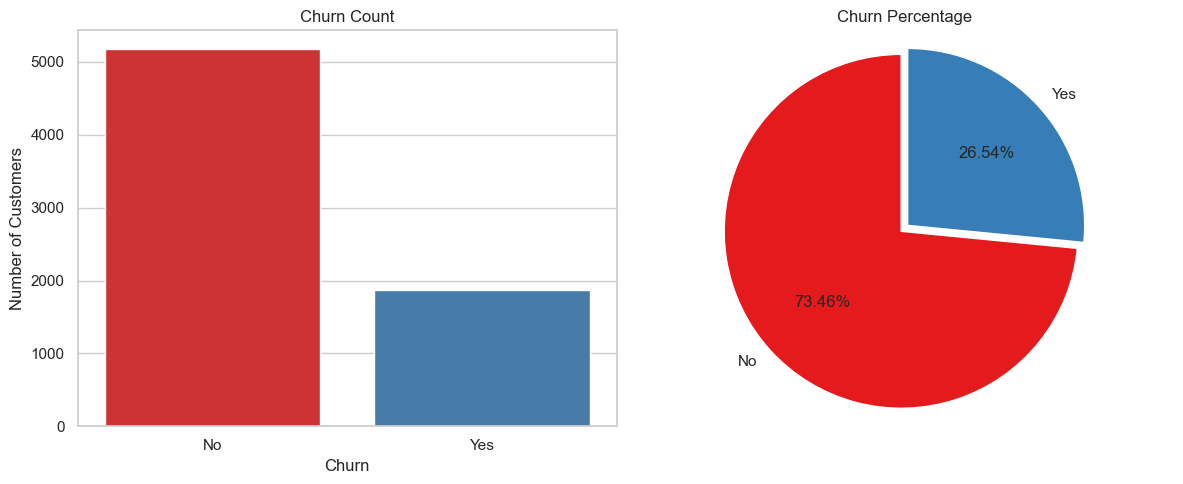

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn styling
sns.set_theme(style="whitegrid")

# Prepare churn data
churn_counts = telco_base_data['Churn'].value_counts()
churn_rate = churn_counts / churn_counts.sum() * 100
labels = churn_counts.index
sizes = churn_counts.values
colors = sns.color_palette('Set1')[0:2]

# Create subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# --- Left: Countplot ---
sns.countplot(x='Churn', data=telco_base_data, palette='Set1', ax=axes[0])
axes[0].set_title('Churn Count')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Number of Customers')

# --- Right: Pie Chart ---
axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.2f%%', 
            startangle=90, explode=(0, 0.05))
axes[1].set_title('Churn Percentage')
axes[1].axis('equal')  # Ensures pie is circular

plt.tight_layout()
plt.show()

In [9]:
churn_val = telco_base_data['Churn'].value_counts()
print("Churn Count :\n",churn_val)
churn_rate = telco_base_data['Churn'].value_counts(normalize=True) * 100
print("\nChurn Percentage :\n",churn_rate)

Churn Count :
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Percentage :
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


⚖️ Data is Highly Imbalanced (Ratio 73:27)

This means:

73% of the data belongs to one class (e.g., customers who did not churn).

Only 27% belongs to the other class (e.g., customers who did churn).

This imbalance can lead to biased analysis if not handled properly.

🔍 Why Analyze Features Separately for Each Target Class?

When the target variable is imbalanced (like in churn = Yes/No), analyzing all data together may hide important patterns. So we:

Split the data based on the target (Churned vs Not Churned).

Analyze each group separately to see how different features behave for churned vs retained customers.

In [10]:
telco_base_data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


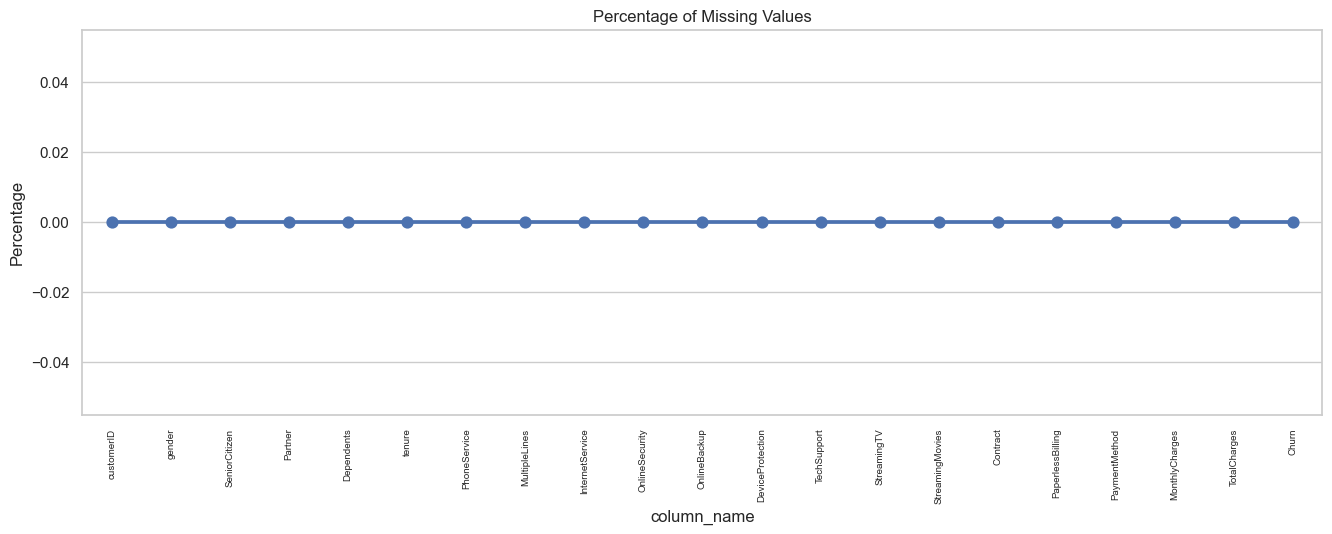

In [11]:
missing = pd.DataFrame((telco_base_data.isnull().sum()) * 100 / telco_base_data.shape[0]).reset_index()
missing.columns = ['column_name', 'missing_percentage'] # Give meaningful column names

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column_name', y='missing_percentage', data=missing) # Specify x and y
plt.xticks(rotation=90, fontsize=7) # Corrected 'sticks' to 'xticks'
plt.title("Percentage of Missing Values") # Corrected 'fo' to 'of'
plt.ylabel("Percentage")
plt.show()

## Data Cleaning

In [12]:
# Make a copy of the base data to preserve the original
cleaned_telco_data = telco_base_data.copy()

In [13]:
# Convert 'TotalCharges' column to numeric, coercing errors to NaN
cleaned_telco_data['TotalCharges'] = pd.to_numeric(cleaned_telco_data['TotalCharges'], errors='coerce')

# Check how many missing values exist
print(cleaned_telco_data.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [14]:
# View rows with missing 'TotalCharges'
missing_total_charges = cleaned_telco_data[cleaned_telco_data['TotalCharges'].isnull()]
missing_total_charges

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
# Drop rows with any missing values
cleaned_telco_data.dropna(how='any', inplace=True)

# Optionally: You could fill NaN values instead of dropping
# cleaned_telco_data.fillna(0, inplace=True)

# Find the maximum tenure value to confirm binning range
print("Max tenure:", cleaned_telco_data['tenure'].max())  # Output: 72

Max tenure: 72


In [16]:
# Create tenure group labels for 12-month intervals
tenure_labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# Categorize 'tenure' into 12-month bins
cleaned_telco_data['tenure_group'] = pd.cut(cleaned_telco_data['tenure'], bins=range(1, 80, 12), right=False, labels=tenure_labels)

# View the count of customers in each tenure group
print(cleaned_telco_data['tenure_group'].value_counts())

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64


In [17]:
# Drop 'customerID' and original 'tenure' columns as they're no longer needed
cleaned_telco_data.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

# View the first few rows of the cleaned dataset
cleaned_telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [18]:
telco_data = cleaned_telco_data
print(telco_data.shape)
telco_data.describe()

(7032, 20)


,SeniorCitizen,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441
std,0.368844,30.085974,2266.771362
min,0.000000,18.250000,18.800000
25%,0.000000,35.587500,401.450000
50%,0.000000,70.350000,1397.475000
75%,0.000000,89.862500,3794.737500
max,1.000000,118.750000,8684.800000


## Data Exploration

### Univariate Analysis

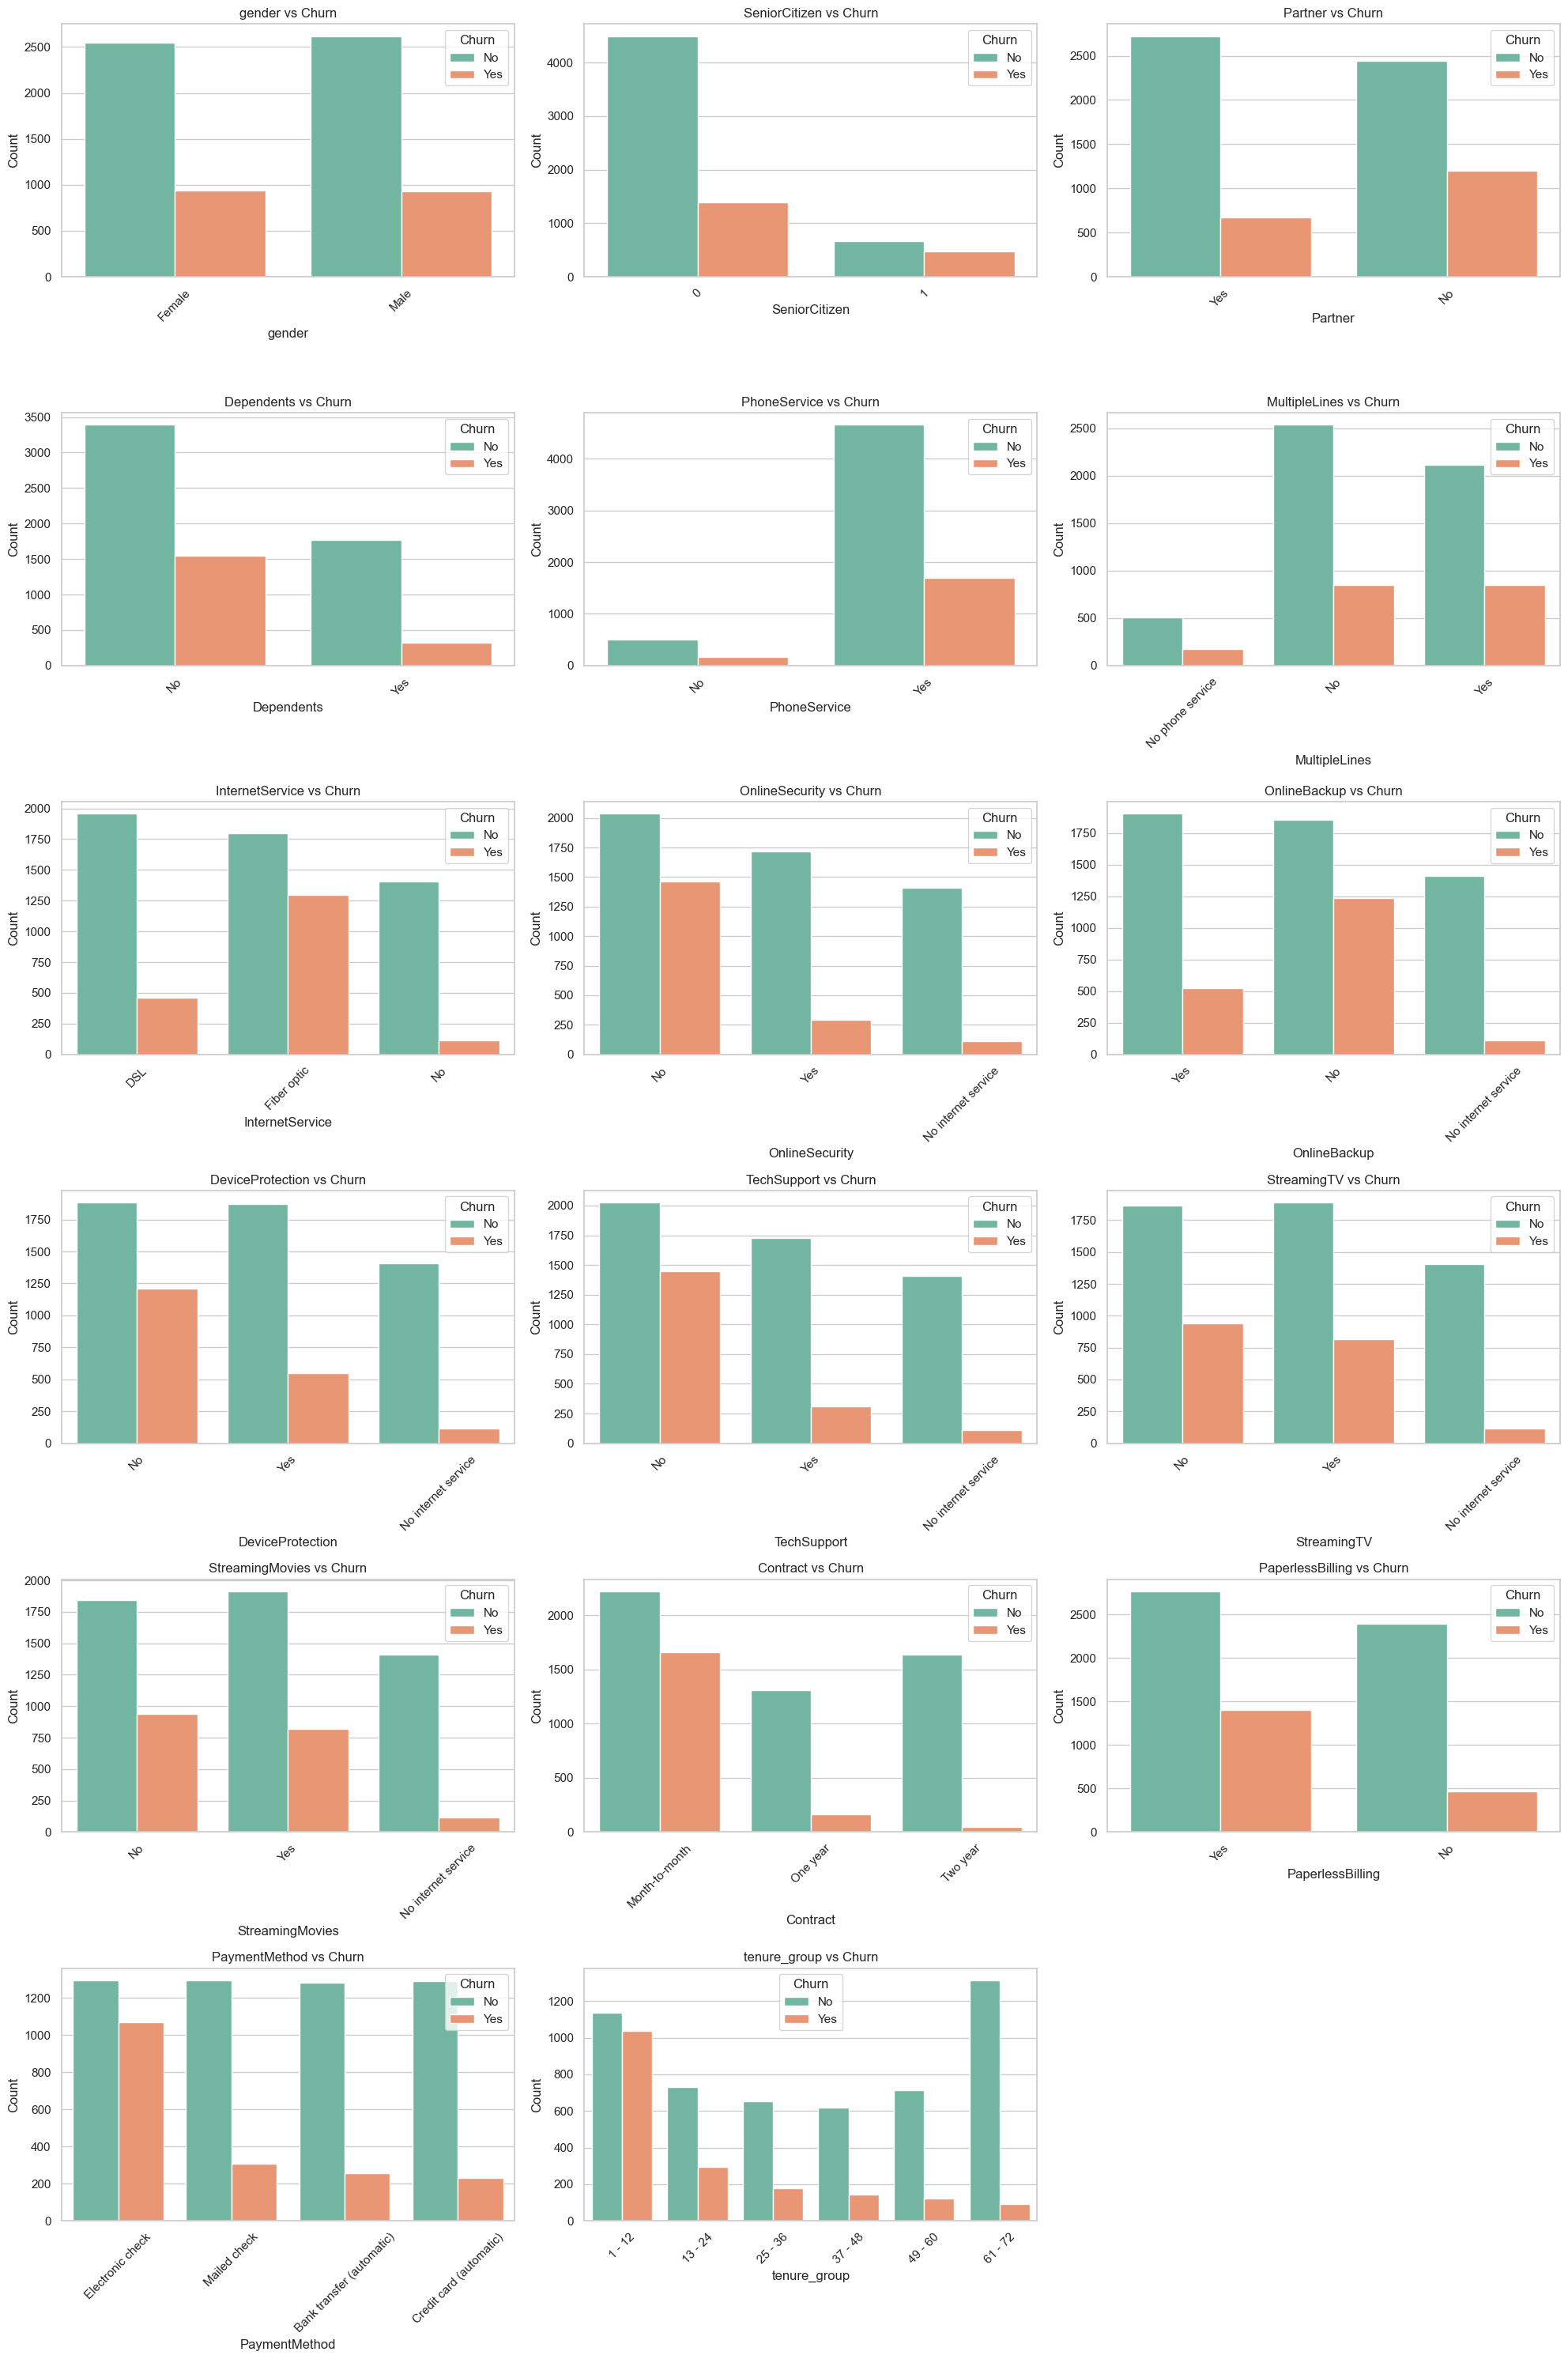

In [19]:
# List of predictors excluding target and continuous variables
predictors = telco_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges']).columns

# Set up the grid
n_cols = 3
n_rows = (len(predictors) + n_cols - 1) // n_cols

plt.figure(figsize=(20, n_rows * 5))

for i, predictor in enumerate(predictors):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=telco_data, x=predictor, hue='Churn', palette='Set2')
    plt.title(f'{predictor} vs Churn')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [20]:
# Convert the 'Churn' column from categorical ('Yes'/'No') to binary (1/0)
# This is useful for machine learning models that require numeric input
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes', 1, 0)

In [21]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [22]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,True,False,False,False,False,False
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,False,True,False,True,False,False,False,False,False


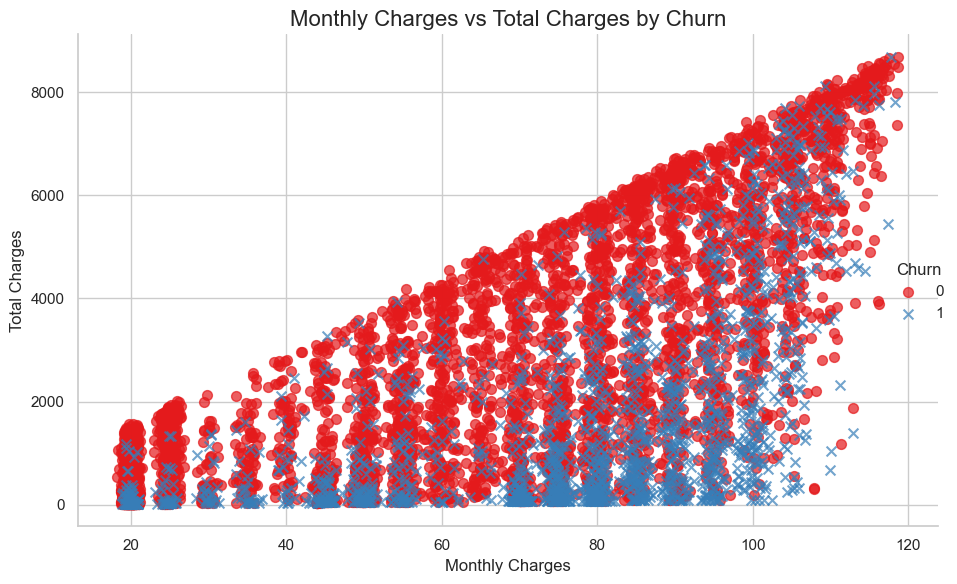

In [23]:
# Apply a nice theme
sns.set(style="whitegrid")

# Plot
plot = sns.lmplot(
    data=telco_data_dummies,
    x='MonthlyCharges',
    y='TotalCharges',
    hue='Churn',                 # Color by churn
    palette='Set1',              # Bright, clear colors
    height=6,                    # Height of the figure
    aspect=1.5,                  # Width-to-height ratio
    fit_reg=False,               # No regression line
    markers=['o', 'x'],          # Different markers for classes
    scatter_kws={'s': 50, 'alpha': 0.7}  # Scatter dot size and transparency
)

# Title and labels
plt.title("Monthly Charges vs Total Charges by Churn", fontsize=16)
plt.xlabel("Monthly Charges", fontsize=12)
plt.ylabel("Total Charges", fontsize=12)

plt.tight_layout()
plt.show()

**Insight:**

There is a clear positive correlation between Monthly Charges and Total Charges — as expected, customers with higher monthly bills tend to accumulate higher total charges over time.

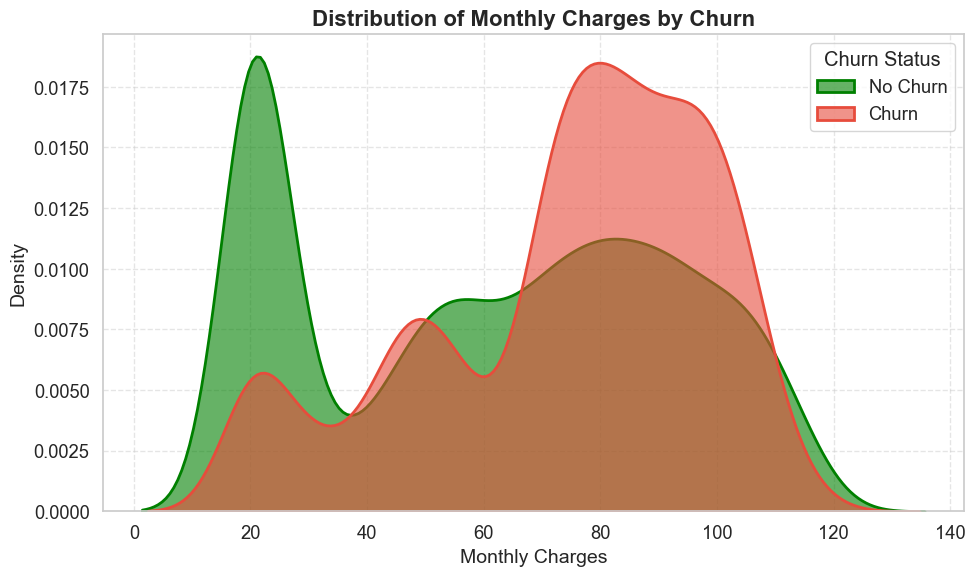

In [24]:
# Set a clean theme
sns.set(style="whitegrid", font_scale=1.2)

# Set up figure
plt.figure(figsize=(10, 6))

# KDE Plot for No Churn
sns.kdeplot(
    telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 0],
    label="No Churn",
    color="green",
    fill=True,
    linewidth=2,
    alpha=0.6
)

# KDE Plot for Churn
sns.kdeplot(
    telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 1],
    label="Churn",
    color="#e74c3c",
    fill=True,
    linewidth=2,
    alpha=0.6
)

# Titles and labels
plt.title('Distribution of Monthly Charges by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Legend and grid
plt.legend(title='Churn Status', loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout
plt.tight_layout()
plt.show()

**Insight:**
 
Customers with higher Monthly Charges exhibit a greater likelihood of churn, indicating that increased billing may be a contributing factor to customer attrition.

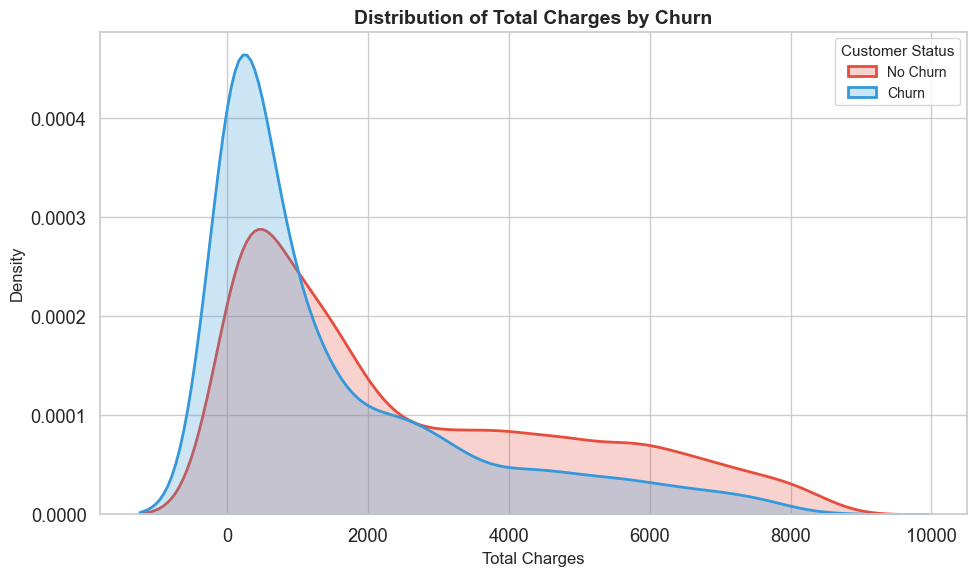

In [25]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

Tot = sns.kdeplot(
    data=telco_data_dummies[telco_data_dummies["Churn"] == 0],
    x="TotalCharges", 
    fill=True, 
    color="#e74c3c",  # Soft red
    label="No Churn", 
    linewidth=2
)

Tot = sns.kdeplot(
    data=telco_data_dummies[telco_data_dummies["Churn"] == 1],
    x="TotalCharges", 
    fill=True, 
    color="#3498db",  # Soft blue
    label="Churn", 
    linewidth=2
)

plt.title("Distribution of Total Charges by Churn", fontsize=14, fontweight='bold')
plt.xlabel("Total Charges", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Customer Status", title_fontsize=11, fontsize=10)
plt.tight_layout()
plt.show()

Although churn is higher at lower Total Charges, this initially seems counterintuitive. However, when we consider the interplay between Tenure, Monthly Charges, and Total Charges, the picture becomes clearer:

➤ Customers with higher Monthly Charges and shorter Tenure naturally accumulate lower Total Charges.

➤ This combination — high Monthly Charge, low Tenure, and low Total Charge — is strongly associated with higher churn.

C:\Users\Arvindh Kumar\AppData\Local\Temp\ipykernel_11672\3256414709.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(x=churn_corr.index, y=churn_corr.values, palette="coolwarm")


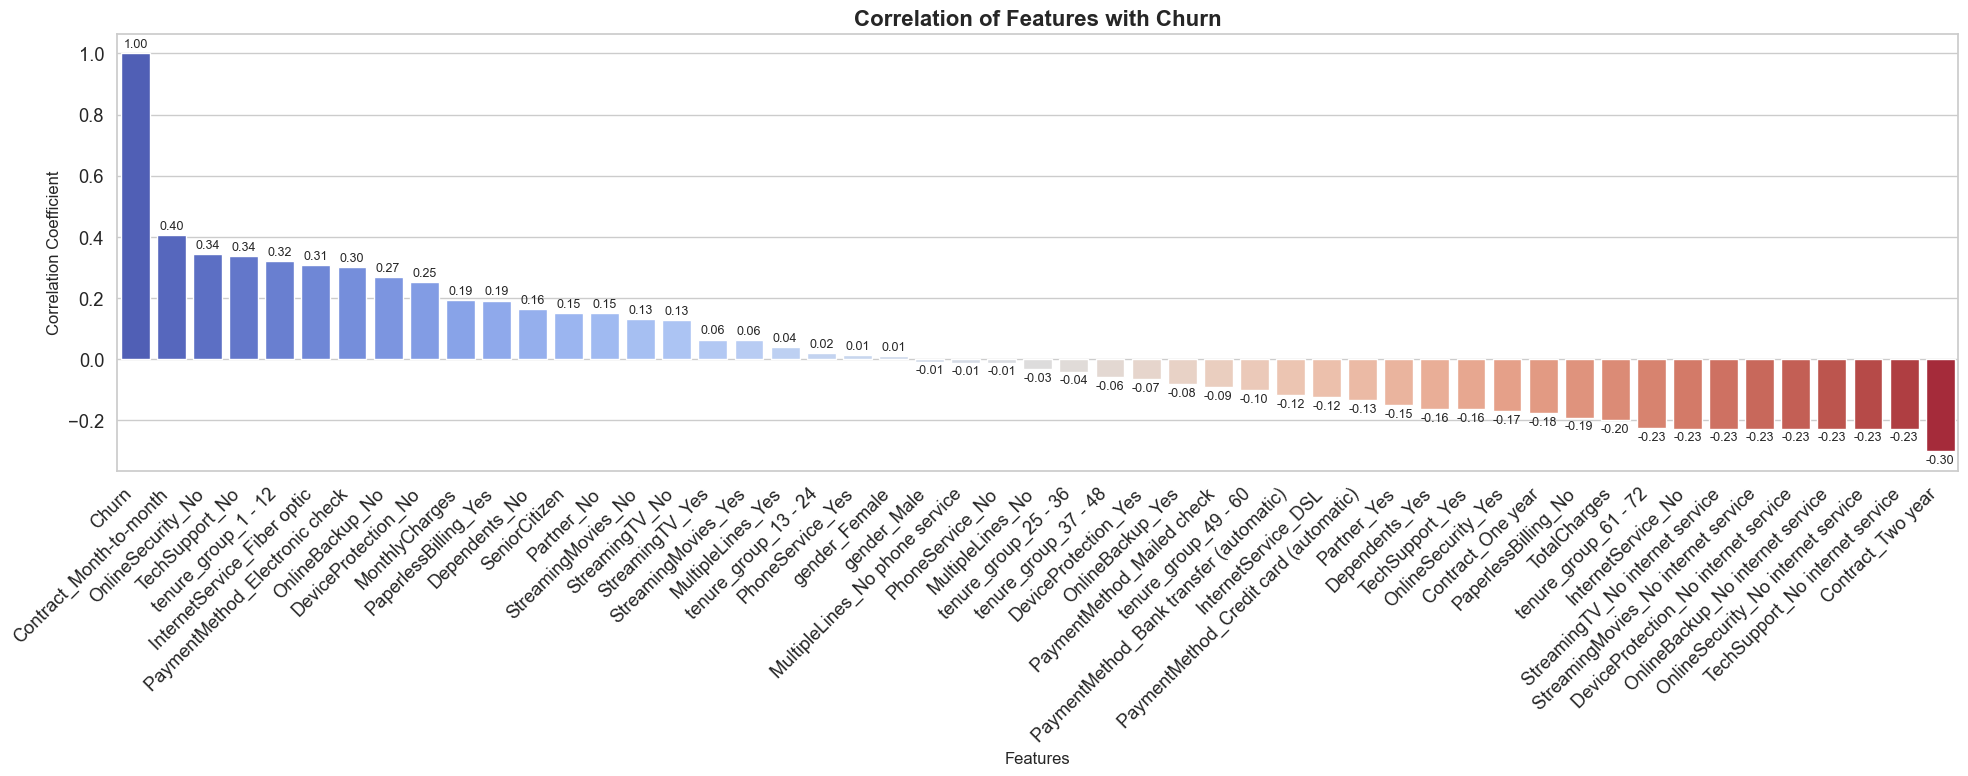

In [26]:
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")

# Compute correlation with Churn
churn_corr = telco_data_dummies.corr()['Churn'].sort_values(ascending=False)

# Create barplot
bar = sns.barplot(x=churn_corr.index, y=churn_corr.values, palette="coolwarm")

# Add labels on top of bars
for i, val in enumerate(churn_corr.values):
    bar.text(i, val + 0.01 if val >= 0 else val - 0.01, f"{val:.2f}", 
             ha='center', va='bottom' if val >= 0 else 'top', fontsize=9)

# Beautify plot
plt.title('Correlation of Features with Churn', fontsize=16, fontweight='bold')
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔍 Derived Insight:

💥 High Churn is prominently observed among customers who:

• Are on Month-to-Month contracts

• Have no Online Security or Tech Support

• Are in their first year of subscription

• Use Fibre Optic Internet

✅ Low Churn is associated with:

• Customers on Long-Term Contracts

• No Internet Service subscriptions

• Customers who have been engaged for 5+ years

⚖️ Factors such as Gender, Phone Service availability, and the number of multiple lines show minimal or no significant impact on churn.

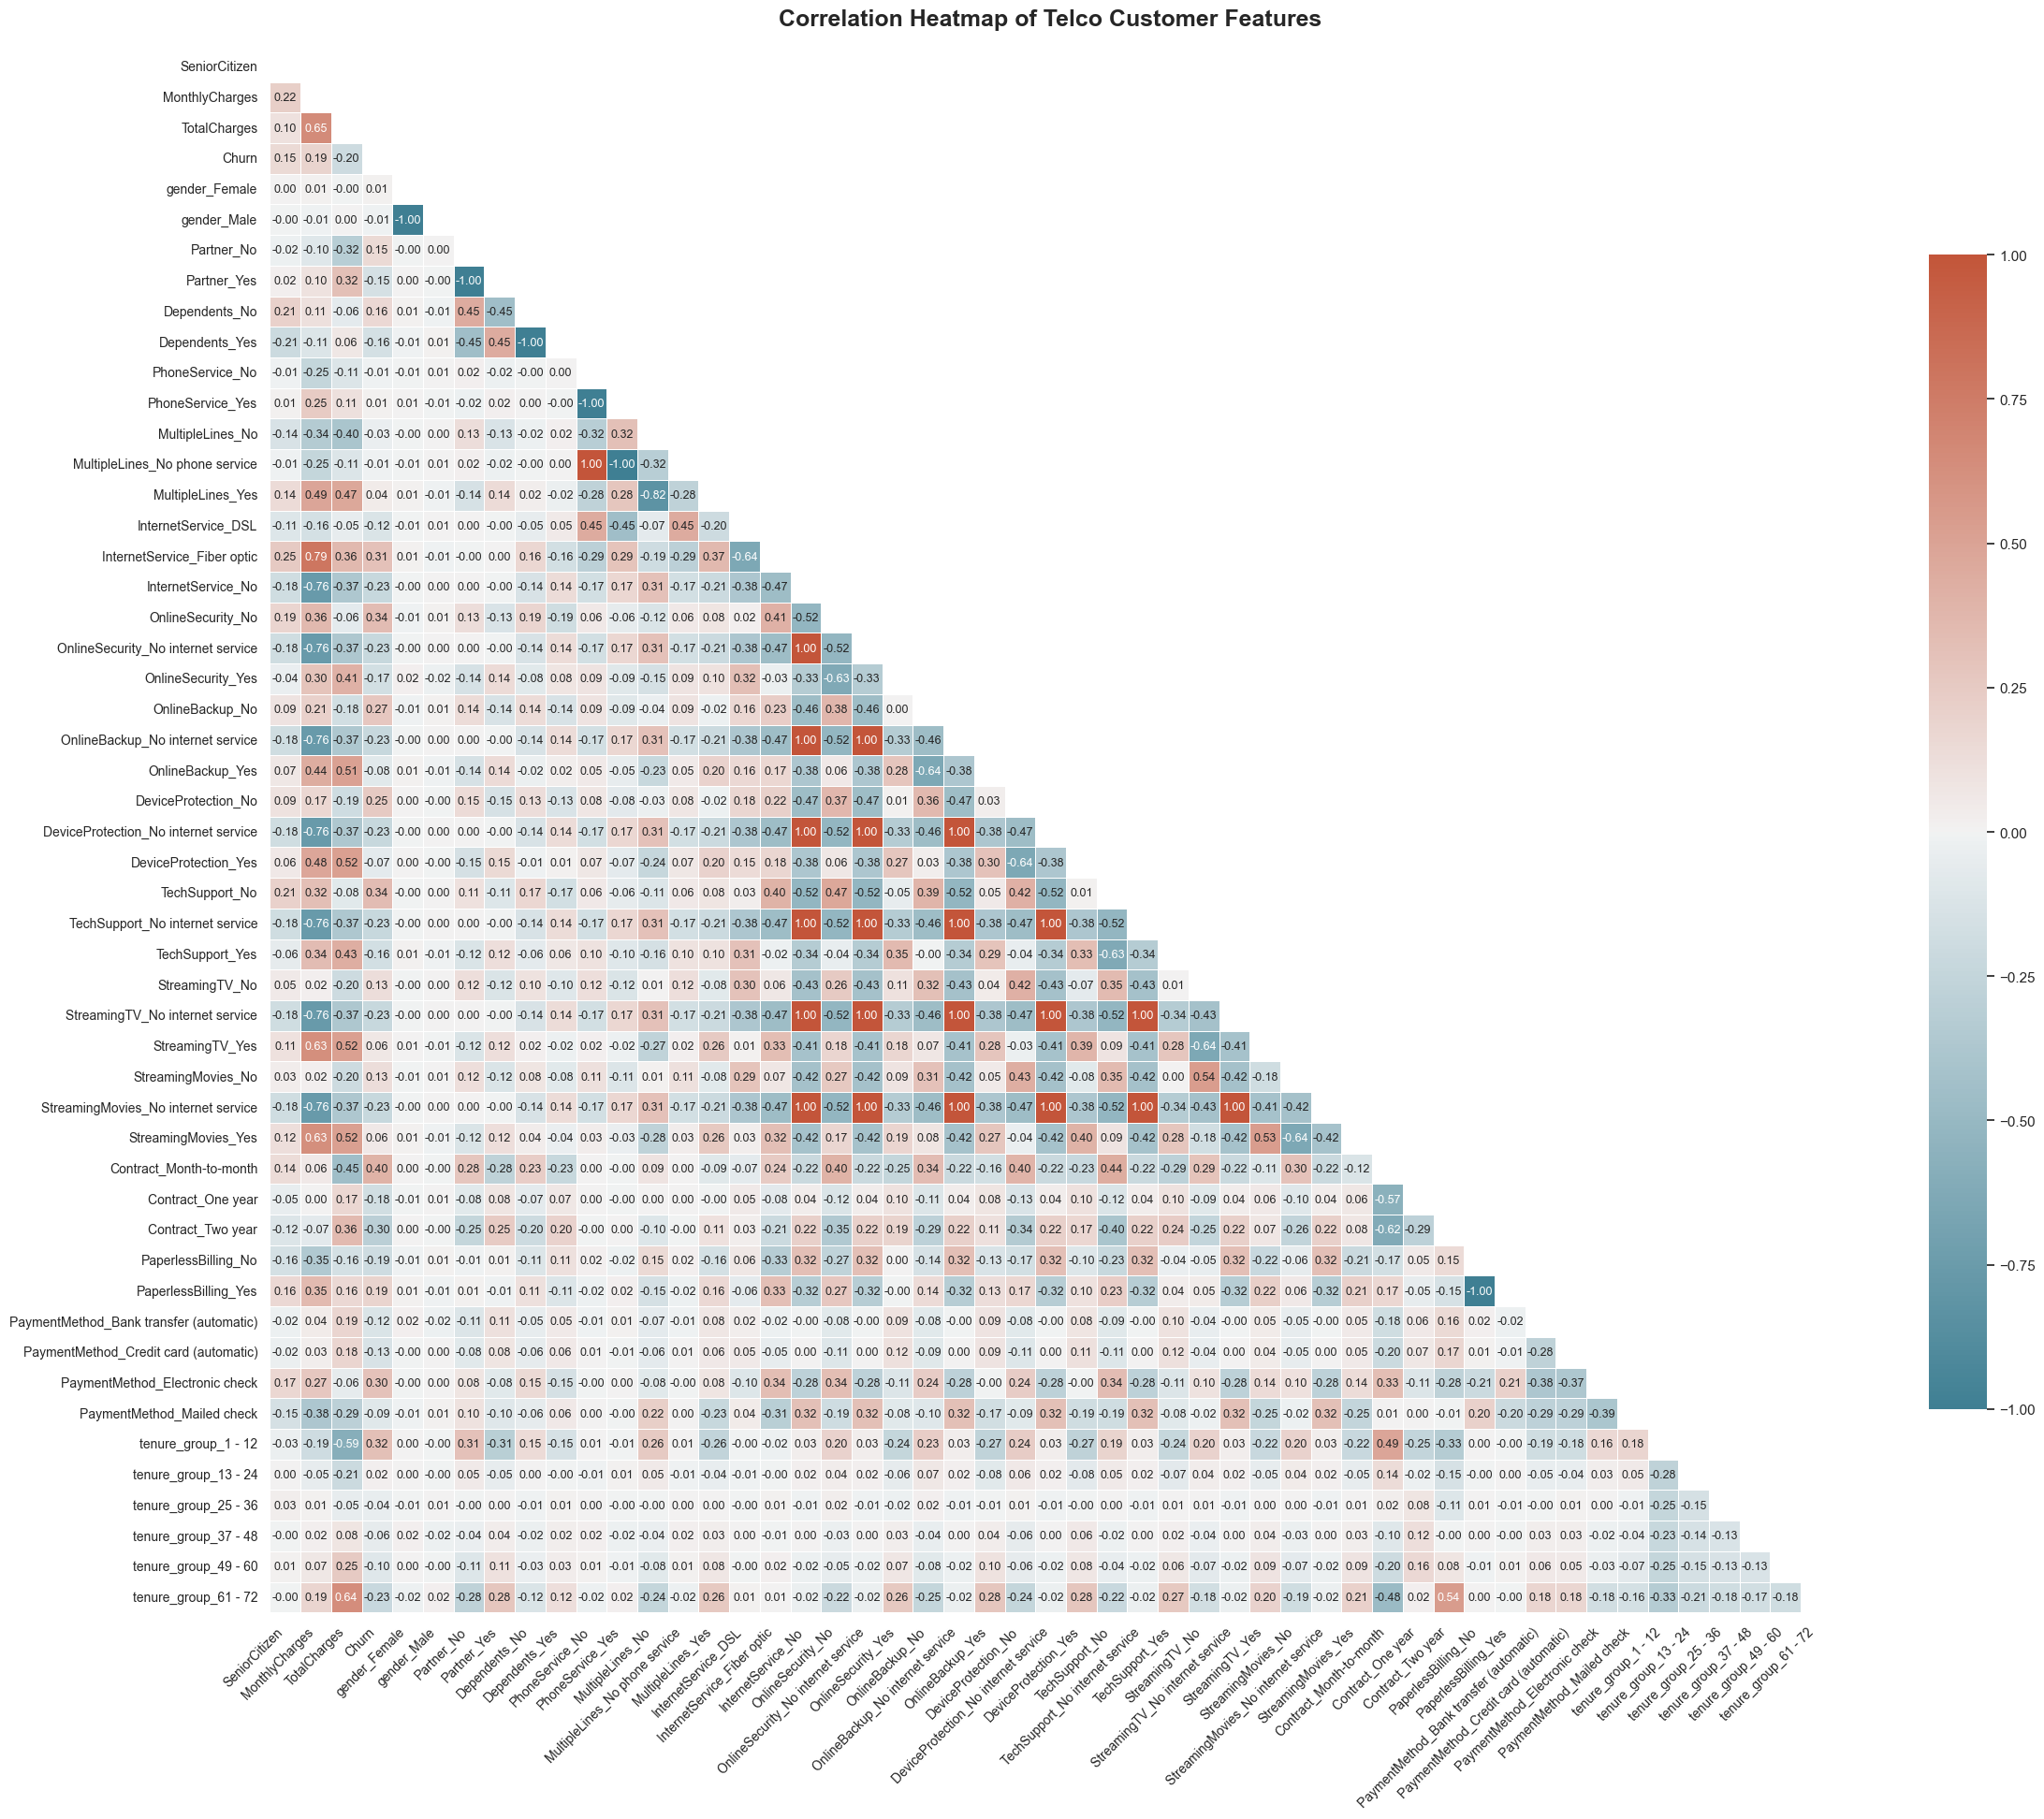

In [27]:
plt.figure(figsize=(24, 22))  # Increased figure size
sns.set(style="white")

# Compute correlation matrix
corr = telco_data_dummies.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Custom diverging palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1.0,
    vmin=-1.0,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .6},
    annot=True,
    fmt=".2f",
    annot_kws={"size": 9},   # Slightly larger for better readability
)

# Improve title and labels
plt.title('Correlation Heatmap of Telco Customer Features', fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.show()


## Bivariate Analysis

In [28]:
# Split the data based on Churn = 0 and Churn = 1
churn_no_df = telco_data.loc[telco_data["Churn"] == 0]  # Customers who didn't churn
churn_yes_df = telco_data.loc[telco_data["Churn"] == 1]  # Customers who churned

In [29]:
# Define a reusable univariate plotting function
def uniplot(df, col, title, hue=None):
    """
    Creates a countplot for a categorical feature with optional hue and log scale for better visibility.

    Parameters:
        df (DataFrame): The dataframe to plot from.
        col (str): The column to analyze.
        title (str): Plot title.
        hue (str, optional): Categorical column to group bars by color.
    """
    # Set general Seaborn styling
    sns.set_style('whitegrid')
    sns.set_context('talk')  # Larger fonts for presentation-like visuals

    # Adjust plot fonts via rcParams
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    # Determine the number of unique values in hue for width calculation
    hue_series = pd.Series(data=hue)
    num_hue_categories = len(hue_series.unique())

    # Dynamically set figure width based on unique values in x-axis and hue
    num_x_categories = len(df[col].unique())
    width = num_x_categories + 7 + 4 * num_hue_categories
    fig, ax = plt.subplots()
    fig.set_size_inches(width, 8)

    # Improve readability
    plt.xticks(rotation=45)
    plt.yscale('log')  # For skewed count distributions

    # Plot title
    plt.title(title)

    # Plot the countplot
    sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        palette='Set2',
        ax=ax
    )

    # Show the final plot
    plt.show()

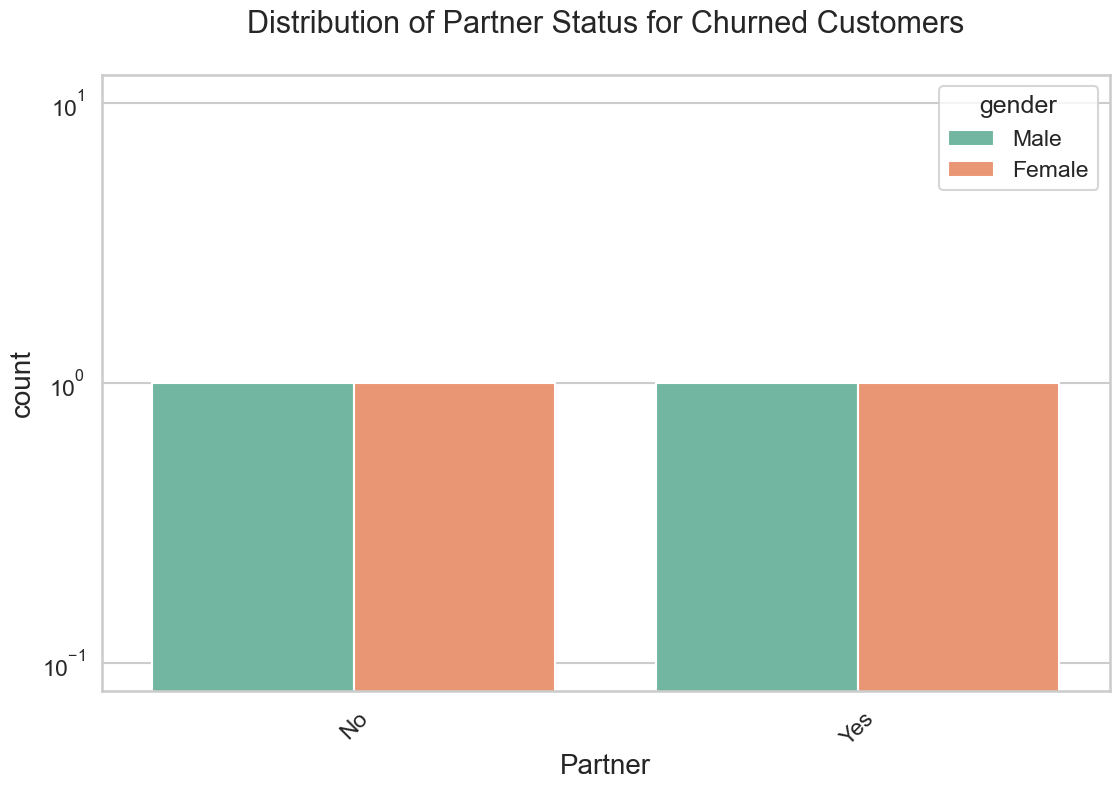

In [30]:
# Plot distribution of Partner feature for churned customers, separated by Gender
uniplot(churn_yes_df, col='Partner', title='Distribution of Partner Status for Churned Customers', hue='gender')

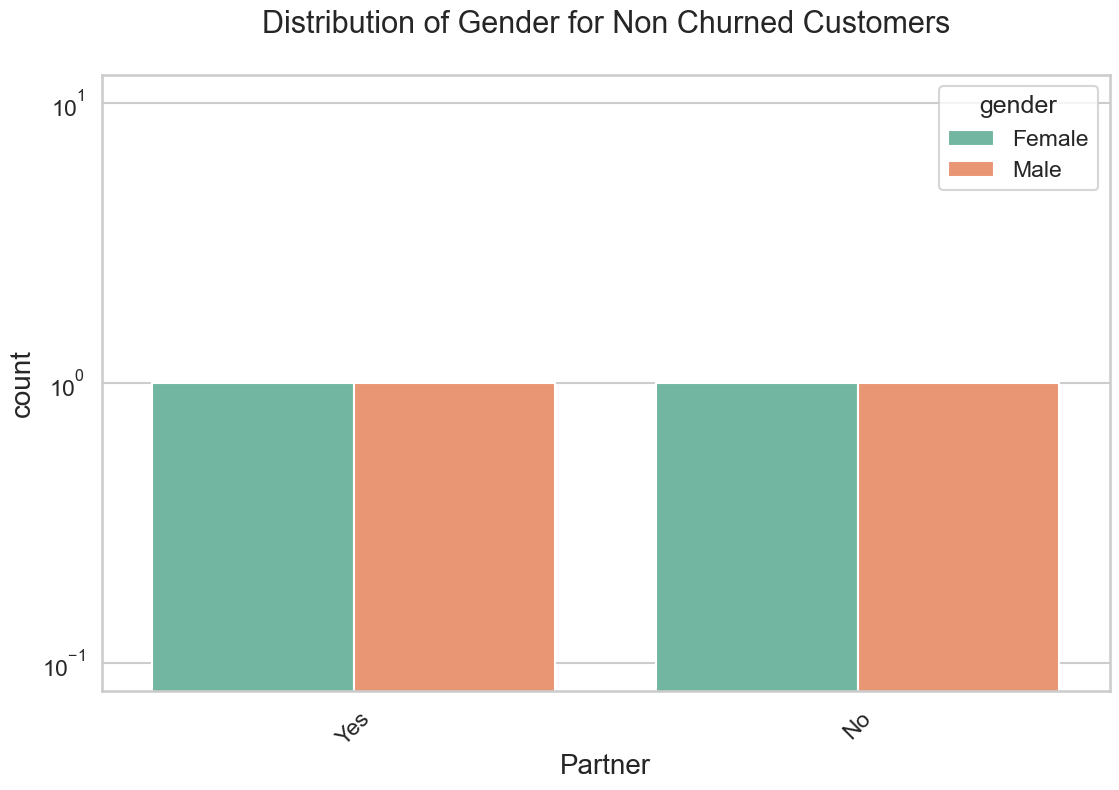

In [31]:
# Plotting the distribution of 'Partner' status among **non-churned** customers,
# with an additional split by 'gender' to analyze if there's any visible pattern or relationship
# between having a partner and gender among customers who did not churn.
uniplot(churn_no_df, col='Partner', title='Distribution of Gender for Non Churned Customers', hue='gender')

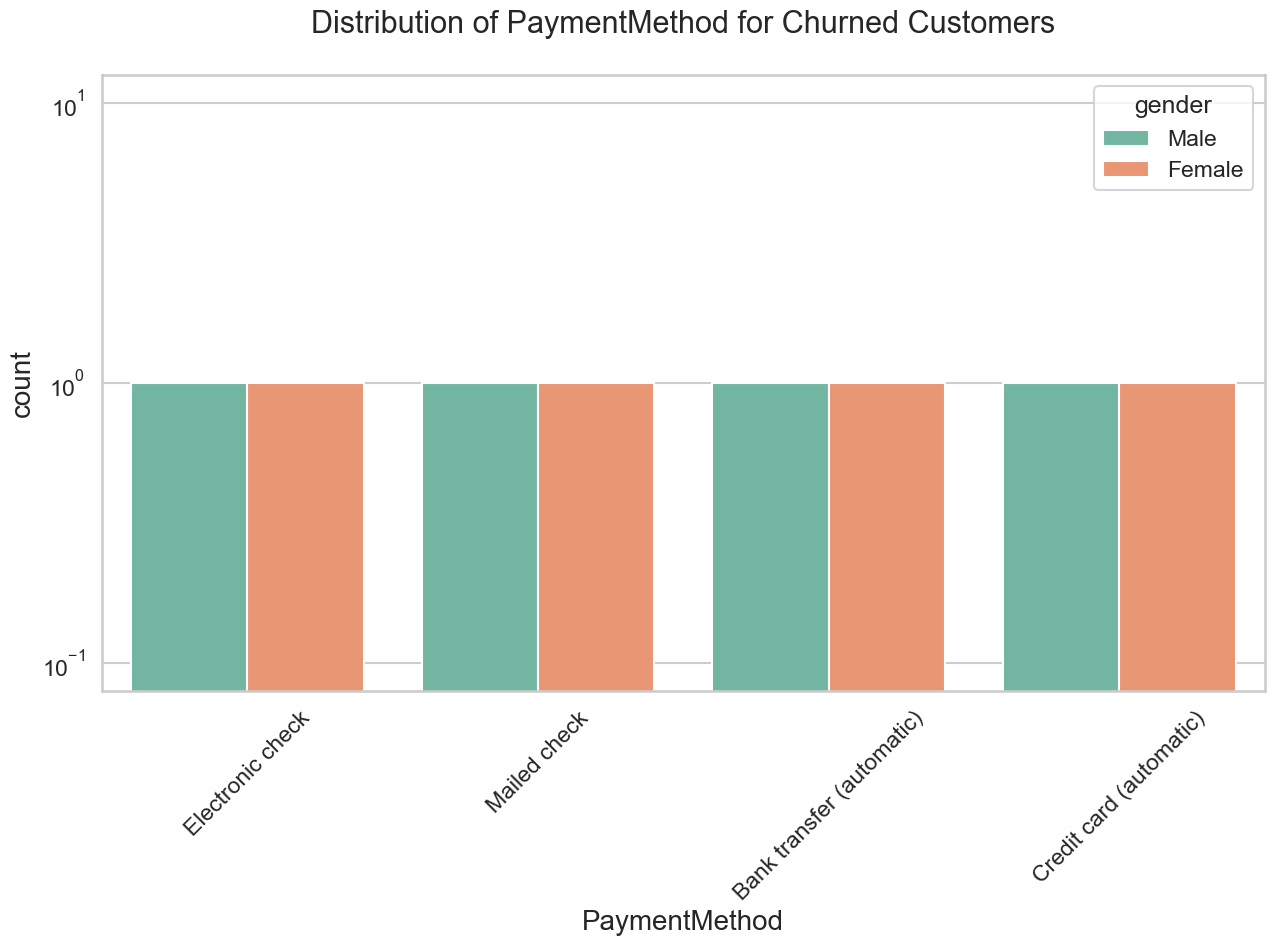

In [32]:
# Visualizing the distribution of 'PaymentMethod' among **churned** customers,
# with 'gender' as a hue to examine if certain payment methods are more common
# among males or females who have churned. This helps identify if gender-based
# preferences in payment methods correlate with churn.
uniplot(churn_yes_df, col='PaymentMethod', title='Distribution of PaymentMethod for Churned Customers', hue='gender')

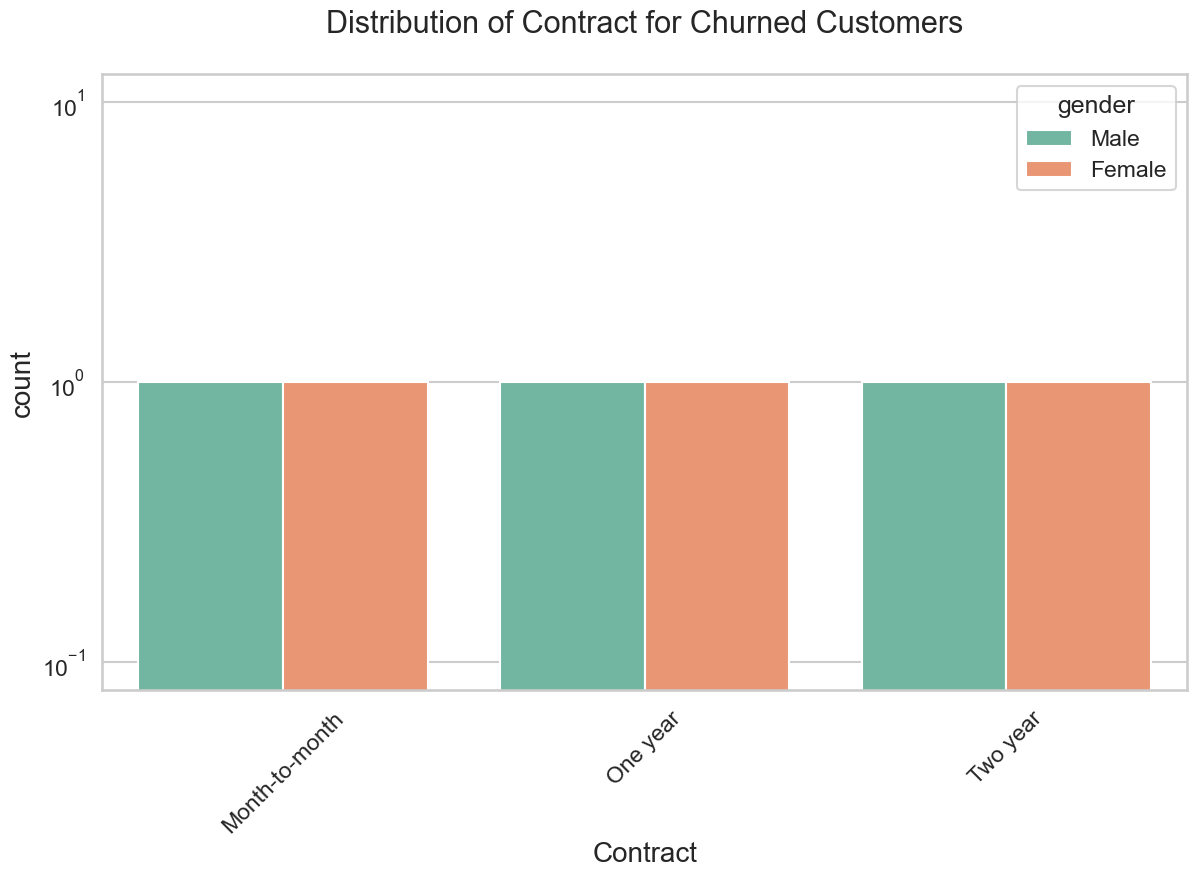

In [33]:
# Analyzing the distribution of 'Contract' types among **churned** customers,
# with 'gender' as a hue to identify if short-term contracts (e.g., month-to-month)
# are more associated with churn, and whether there's a gender-based trend.
uniplot(churn_yes_df, col='Contract', title='Distribution of Contract for Churned Customers', hue='gender')

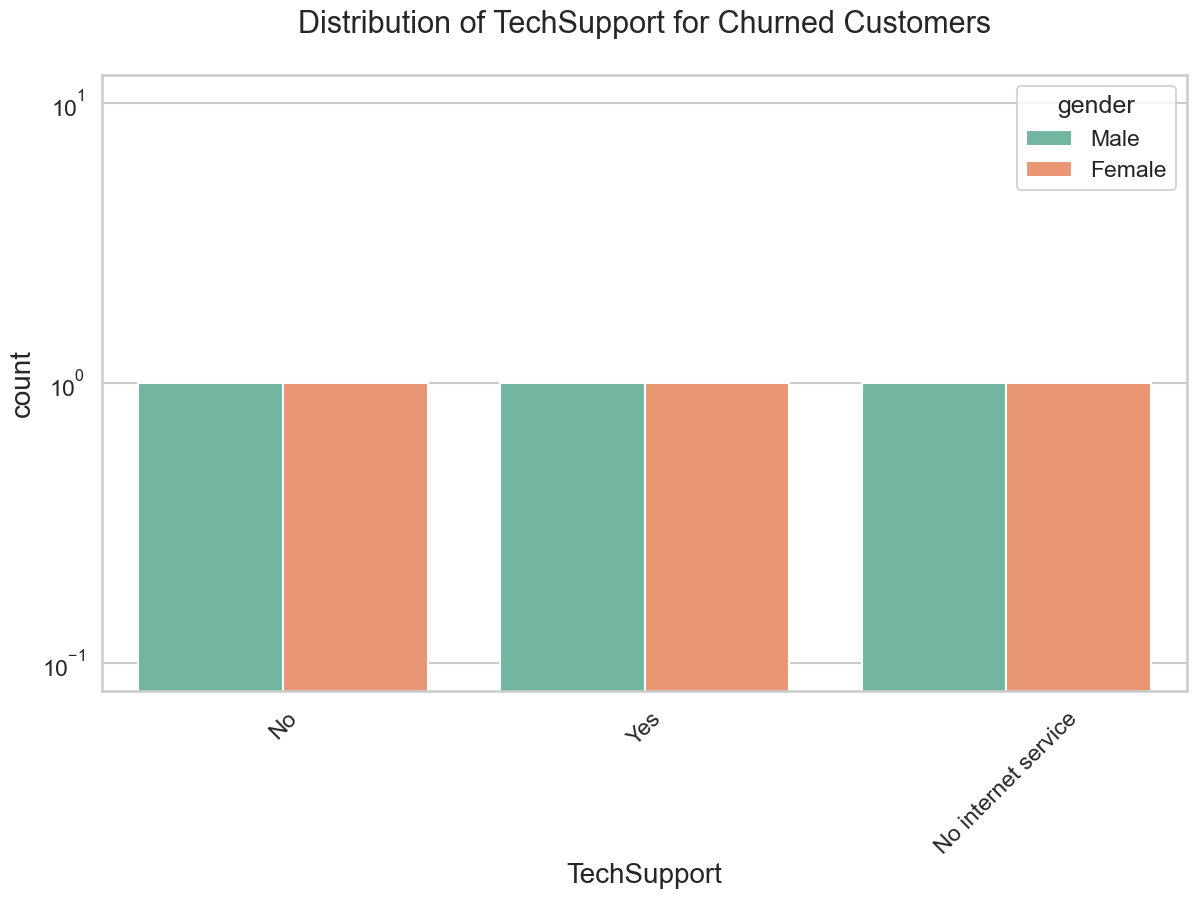

In [34]:
# Visualizing how access to TechSupport varies among **churned** customers,
# categorized by 'gender'. This helps determine if lack of technical support
# contributes to churn and whether there's a gender-based pattern in support usage.
uniplot(churn_yes_df, col='TechSupport', title='Distribution of TechSupport for Churned Customers', hue='gender')

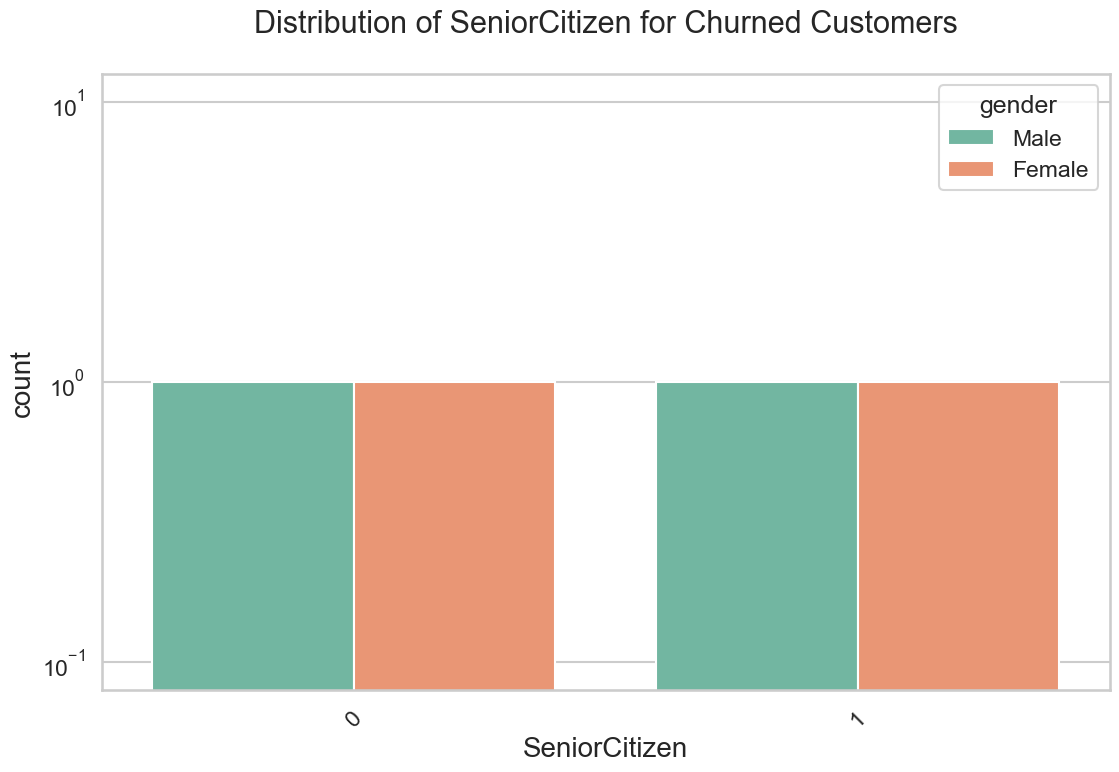

In [35]:
# Analyzing the distribution of **Senior Citizens** among churned customers,
# with gender as the hue. This helps us understand if age (senior status) influences churn,
# and whether there's a difference between male and female senior customers in this regard.
uniplot(churn_yes_df, col='SeniorCitizen', title='Distribution of SeniorCitizen for Churned Customers', hue='gender')

In [36]:
telco_data_dummies.to_csv('Telco_Churn_Dataset.csv')